앞선 글 "시가총액 분석 01 - 시가총액 데이터 만들기"에서 만들어진 1995년~2015년 시가총액 데이터를 가지고 분석을 해본다. 주로 다음과 같은 내용을 살펴볼 것이다.

1. 특정 조건에 해당하는 데이터 추출 (DataFrame.ix[] 활용법)
1. 연도별 시가총액 1위 기업의 변화 살펴보기
1. 관심종목을 선별적으로 처리하는 방법들
1. 시가총액의 변화 시각화 (matplotlib 차트)


In [1]:
# Jupyter Notebook 내에 출력하기 위해
from IPython.display import display

## matplotlib 기본 설정

In [2]:
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2 
mpl.rcParams['lines.color'] = 'r'

[%matplotlib inline](https://ipython.org/ipython-doc/3/notebook/notebook.html#plotting) 은 의 실행 결과를 Jupyter Notebook 내에서 보기 위한 매직 커멘드이다.

matplotlib.rcParams 은 matplotlib의 기본값들을 지정한다. 일종의  matplotlib에 대한 설정이라고 할 수 있다. 여기서는 그래프 선의 두께를 2, 색깔을 r(red)를 기본값으로 지정하였다.

## 데이터 읽고 확인

시가총액 순위 데이터를 일부 가공하고, 1995년~2015년까지의 CSV 파일 전체를 묶어서 krx-marcap.csv 라는 데이터 파일을 만들었었다. 먼저 이 파일을 DataFrame으로 읽는다. 

In [3]:
import pandas as pd

In [4]:
df_master = pd.read_csv('data/krx-marcap.csv')
df_master.set_index('code', inplace=True, drop=False)
df_master.head()

,rank,code,corp_name,marcap,marcap_pct,year
code,,,,,,
015760,1,015760,한국전력,18.994194,0.134566,1995-12-01
005930,2,005930,삼성전자,7.665979,0.054310,1995-12-01
005490,3,005490,POSCO,4.760822,0.033728,1995-12-01
017670,4,017670,SK텔레콤,3.229820,0.022882,1995-12-01
000200,5,000200,대우중공업,3.019233,0.021390,1995-12-01


DataFrame.ix[] 로 다양한 검색을 할 수 있다. ([]에 다양한 조건을 지정할 수 있다)

종목명 '삼성전자'인 것만 DataFrame으로 추출하려면 다음과 같이 한다.

In [5]:
t = df_master.ix[df_master['corp_name'] == '삼성전자']
print( len(t), "rows" )

t.head()

21 rows


,rank,code,corp_name,marcap,marcap_pct,year
code,,,,,,
005930,2,005930,삼성전자,7.665979,0.054310,1995-12-01
005930,3,005930,삼성전자,3.192433,0.025545,1996-12-01
005930,3,005930,삼성전자,3.719746,0.047654,1997-12-01
005930,3,005930,삼성전자,9.972258,0.068448,1998-12-01
005930,2,005930,삼성전자,39.857115,0.087447,1999-12-01


물론 코드('code')로도 검색(추출)할 수 있다.

In [6]:
t = df_master.ix[df_master['code'] == '005930']
print( len(t), "rows" )

t.head()

21 rows


,rank,code,corp_name,marcap,marcap_pct,year
code,,,,,,
005930,2,005930,삼성전자,7.665979,0.054310,1995-12-01
005930,3,005930,삼성전자,3.192433,0.025545,1996-12-01
005930,3,005930,삼성전자,3.719746,0.047654,1997-12-01
005930,3,005930,삼성전자,9.972258,0.068448,1998-12-01
005930,2,005930,삼성전자,39.857115,0.087447,1999-12-01


연도를 지정하려면 'year' 컬럼이 '2015'로 시작하는 로우(row)들을 추출하면 된다.

In [7]:
t = df_master.ix[df_master['year'].str.startswith('2015')]
print( len(t), "rows" )

t.head()

2133 rows


,rank,code,corp_name,marcap,marcap_pct,year
code,,,,,,
005930,1,005930,삼성전자,190.752641,0.130428,2015-12-01
005380,2,005380,현대차,33.371887,0.022818,2015-12-01
015760,3,015760,한국전력,32.290793,0.022079,2015-12-01
028260,4,028260,삼성물산,27.979281,0.019131,2015-12-01
005935,5,005935,삼성전자우,24.888435,0.017018,2015-12-01


간단하지만 유용한 팁 하나. str.startswith() 함수에 여러개의 여러 문자열 지정하려면 문자열 튜플을 지정한다.

In [8]:
t = df_master.ix[df_master['year'].str.startswith(('2011', '2013', '2015'))]
print( len(t), "rows" )

t.tail()

6084 rows


,rank,code,corp_name,marcap,marcap_pct,year
code,,,,,,
092630,2129,092630,바다로3호,0.002426,0.000002,2015-12-01
000327,2130,000327,노루홀딩스2우B,0.002272,0.000002,2015-12-01
002787,2131,002787,진흥기업2우B,0.002264,0.000002,2015-12-01
183410,2132,183410,데카시스템,0.002242,0.000002,2015-12-01
004987,2133,004987,성신양회2우B,0.002196,0.000002,2015-12-01


종목명이 '삼성전자', '현대차', 'KB금융'인 것을 추출하고자 한다면,

In [9]:
t = df_master.ix[df_master['corp_name'].isin(['삼성전자', '현대차', 'KB금융'])]
print( len(t), "rows" )

t.tail()

50 rows


,rank,code,corp_name,marcap,marcap_pct,year
code,,,,,,
005380,2,005380,현대차,37.226725,0.027848,2014-12-01
105560,15,105560,KB금융,13.966614,0.010448,2014-12-01
005930,1,005930,삼성전자,190.752641,0.130428,2015-12-01
005380,2,005380,현대차,33.371887,0.022818,2015-12-01
105560,21,105560,KB금융,13.213228,0.009035,2015-12-01


컬럼 값으로 크기 비교를 통해 로우(row)들을 추출할 수 있다.
예를 들어, 시가총액 컬럼(marcap)이 30조원을 넘는 모든 행을 추출하려면,

In [10]:
t = df_master.ix[df_master['marcap'] > 30.]
print( len(t), "rows" )

t.tail()

36 rows


,rank,code,corp_name,marcap,marcap_pct,year
code,,,,,,
005380,2,005380,현대차,37.226725,0.027848,2014-12-01
000660,3,000660,SK하이닉스,34.762113,0.026005,2014-12-01
005930,1,005930,삼성전자,190.752641,0.130428,2015-12-01
005380,2,005380,현대차,33.371887,0.022818,2015-12-01
015760,3,015760,한국전력,32.290793,0.022079,2015-12-01


## 연도별 시가총액 1위 종목

순위('rank')가 1인 종목만 추출해 보자

In [11]:
df_master.ix[df_master['rank'] == 1]

,rank,code,corp_name,marcap,marcap_pct,year
code,,,,,,
015760,1,015760,한국전력,18.994194,0.134566,1995-12-01
015760,1,015760,한국전력,15.440259,0.123548,1996-12-01
015760,1,015760,한국전력,9.863011,0.126356,1997-12-01
015760,1,015760,한국전력,18.720913,0.128498,1998-12-01
030200,1,030200,KT,55.883739,0.122610,1999-12-01
022875,1,022875,평화은행우선,44.044000,0.168510,2000-12-01
005930,1,005930,삼성전자,42.220610,0.137106,2001-12-01
005930,1,005930,삼성전자,47.958513,0.161827,2002-12-01
005930,1,005930,삼성전자,68.034797,0.173112,2003-12-01


1998년 이전에 한국전력이 시가총액 1위 였다가 2001년 이후는 줄 곧 삼성전자가 1위를 하고 있다. 시가총액 1위에 대한 데이터만 가지고 섣불리 판단하기는 어렵지만, 10년 이상의 기간을 놓고 볼 때, 확실히 한국전력(기간산업)에서 삼성전자(전기, 전자 제조 산업)으로 큰 이동이 있음을 추정할 수 있다. 산업의 변화는 나중에 좀 더 자세히 살펴보자.

데이터를 보니 약간의 궁금한 점이 생긴다. 딱 한 해씩 시가총액 1위를 한 종목이 있는데, "KT"와  "평화은행우선"이다.

"KT" 부터 살펴보자.

In [12]:
df_kt = df_master.ix[df_master['corp_name'] == 'KT']
df_kt

,rank,code,corp_name,marcap,marcap_pct,year
code,,,,,,
030200,2,030200,KT,10.940864,0.075097,1998-12-01
030200,1,030200,KT,55.883739,0.122610,1999-12-01
030200,4,030200,KT,20.917377,0.080029,2000-12-01
030200,3,030200,KT,15.594373,0.050641,2001-12-01
030200,3,030200,KT,15.670237,0.052876,2002-12-01
030200,6,030200,KT,12.704283,0.032326,2003-12-01
030200,8,030200,KT,11.821250,0.026624,2004-12-01
030200,12,030200,KT,11.636098,0.016022,2005-12-01
030200,10,030200,KT,13.002674,0.016740,2006-12-01


시가총액 순위면에서 "KT"는 1999년을 제외하고 지속적으로 하락세이다. (기업이 하락세라는 이야기는 아니다. 단지, 주식시장의 시가총액 순위 즉, 시가총액의 비중이 다른 종목에 비해 상대적으로 낮아졌다는 이야기이므로 종목 자체가 하락세라고 읽어서는 안된다)

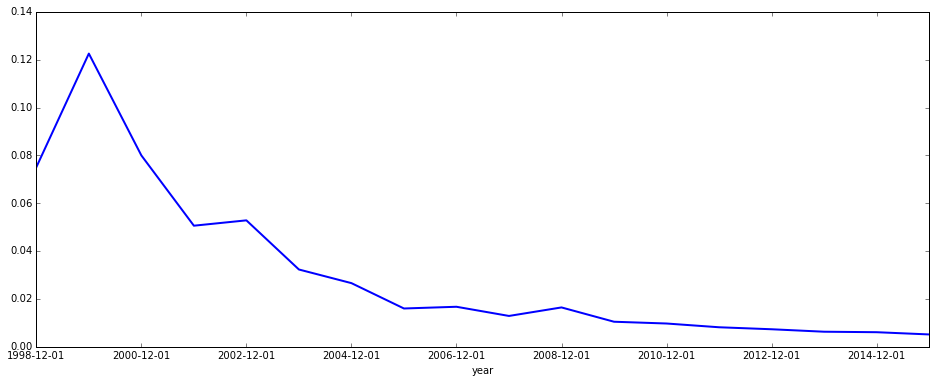

In [13]:
df_kt.set_index('year')['marcap_pct'].plot(figsize=(16,6))

2000년 말, 시가총액 1위 종목은 "평화은행우선"(평화은행 우선주) 이다.

In [14]:
df_peace = df_master.ix[df_master['corp_name'] == '평화은행우선']
df_peace

,rank,code,corp_name,marcap,marcap_pct,year
code,,,,,,
022875,9,022875,평화은행우선,7.304,0.016025,1999-12-01
022875,1,022875,평화은행우선,44.044,0.168510,2000-12-01


평화은행은 1992년부터 2001년까지 있던 시중은행이다. 외환위기 이후 부실이 심화되어 1998년말에는 퇴출까지 검토되었다. 
평화은행 우선주는 실제 시장에서 거래가 전혀 안되는 주식이었다(예금보험공사가 평화은행의 경영정상화를 위해 우선주 형식으로 출자).

<strike>평화은행주 절반만 팔아도 시중은행 전부 살수 있다는 우스갯 소리까지 나돌았다.</strike>

평화은행 우선주는 시가총액을 엄청나게 왜곡하는 결과를 초래했기 때문에 결국 시가총액 산정에서 제외된다. http://goo.gl/PCKUr7

## 관심종목

특정 종목들을 관찰하고 싶을 때가 많기 때문에 관심 종목(favorite stocks)의 목록을 관리 할 필요가 있다.  

다음 20개 종목을 관심종목이라고 가정하고, 이 목록을 가지고 DataFrame을 만든다.

In [15]:
fav_code_corp = [
    ('005930', '삼성전자'),
    ('005380', '현대차'),
    ('015760', '한국전력'),
    ('028260', '삼성물산'),
    ('012330', '현대모비스'),
    ('090430', '아모레'),
    ('000660', '하이닉스'),
    ('051910', 'LG화학'),
    ('032830', '삼성생명'),
    ('000270', '기아차'),
    ('035420', 'NAVER'),
    ('018260', '삼성SDS'),
    ('055550', '신한지주'),
    ('017670', 'SK텔레콤'),
    ('034730', 'SK'),
    ('051900', 'LG생활건강'),
    ('005490', 'POSCO'),
    ('033780', 'KT&G'),
    ('000810', '삼성화재'),
    ('105560', 'KB금융'),
]

fav_stocks = pd.DataFrame(data=fav_code_corp , columns=['code', 'corp_name'])
fav_stocks

,code,corp_name
0,005930,삼성전자
1,005380,현대차
2,015760,한국전력
3,028260,삼성물산
4,012330,현대모비스
5,090430,아모레
6,000660,하이닉스
7,051910,LG화학
8,032830,삼성생명
9,000270,기아차


관심종목(fav_stocks)목록을 관리하는 이유 중의 하나는 이름을 다르게 부여하거나, 간략하게 표기하기 위해서도 사용한다. 예를 들어, 종목코드 005490의 종목명이 'POSCO'인데, 한글 명칭 '포스코'로 바꾸어 사용할 수도 있을 것이다.

df_master의 종목명을 fav_stocks(관심종목)에서 지정한 종목명을 기준으로 바꾼다.

In [16]:
for index, row in fav_stocks.iterrows():
    df_master.loc[row['code'], 'corp_name'] = row['corp_name']

df_master 의 종목명 전체를에서 관심종목 fav_stocks 에 해당하는 종목만 추출 한다.

In [17]:
df_fav = df_master.loc[df_master['code'].isin(fav_stocks['code'])]

print (len(df_fav), 'rows')
df_fav.head()

299 rows


,rank,code,corp_name,marcap,marcap_pct,year
code,,,,,,
015760,1,015760,한국전력,18.994194,0.134566,1995-12-01
005930,2,005930,삼성전자,7.665979,0.054310,1995-12-01
005490,3,005490,POSCO,4.760822,0.033728,1995-12-01
017670,4,017670,SK텔레콤,3.229820,0.022882,1995-12-01
005380,13,005380,현대차,1.408595,0.009979,1995-12-01


## 피봇(pivot)

DataFrame.pivot() 함수는 DataFrame의 형태를 바꾸는 함수이다. 즉, 축을 바꾸어 재정렬(reshape)하는 함수다.
순서대로 index, column, value 세개의 인자를 지정하며, 각 index와 column 조합에 대해 고유한 value 한 개를 가지고 있어야 한다.

연도(year)를 인덱스로, 종목명(corp_name)을 컬럼으로 하고, 순위(rank)를 value로 지정하면, 연도별 종목의 순위를 아래와 같이 나열해 볼 수 있다. 

In [18]:
pivoted = df_fav.pivot('year', 'corp_name', 'rank')
pivoted

corp_name,KB금융,KT&G,LG생활건강,LG화학,NAVER,POSCO,SK,SK텔레콤,기아차,삼성SDS,삼성물산,삼성생명,삼성전자,삼성화재,신한지주,아모레,하이닉스,한국전력,현대모비스,현대차
year,,,,,,,,,,,,,,,,,,,,
1995-12-01,NaN,NaN,NaN,NaN,NaN,3,NaN,4,15,NaN,NaN,NaN,2,29,NaN,NaN,NaN,1,57,13
1996-12-01,NaN,NaN,NaN,NaN,NaN,2,NaN,4,10,NaN,NaN,NaN,3,28,NaN,NaN,16,1,49,24
1997-12-01,NaN,NaN,NaN,NaN,NaN,2,NaN,4,26,NaN,NaN,NaN,3,29,NaN,NaN,6,1,73,16
1998-12-01,NaN,NaN,NaN,NaN,NaN,4,NaN,5,146,NaN,NaN,NaN,3,23,NaN,NaN,10,1,92,24
1999-12-01,NaN,15,NaN,NaN,NaN,7,NaN,4,22,NaN,NaN,NaN,2,47,NaN,NaN,8,5,101,18
2000-12-01,NaN,9,NaN,NaN,NaN,6,NaN,3,11,NaN,NaN,NaN,2,28,NaN,NaN,19,5,62,13
2001-12-01,NaN,11,80,35,NaN,6,NaN,2,13,NaN,NaN,NaN,1,17,9,NaN,22,5,33,8
2002-12-01,NaN,18,68,20,112,6,NaN,2,13,NaN,NaN,NaN,1,16,10,NaN,32,5,25,7
2003-12-01,NaN,19,99,21,58,4,NaN,2,17,NaN,NaN,NaN,1,23,11,NaN,32,5,12,7


1995~2015년까지 관심종목의 시가총액 순위표가 된다. NaN 이 눈에 띄는데 데이터가 없다는 뜻이며, 이는 상장하기 전이라는 의미가 된다. 예를 들어, '아모레' 종목의 경우 2006년에 상장된 종목임을 알 수 있다.

실제, 아모레퍼시픽은 2006년 6월 태평양의 기업 분할로 화장품 사업 부문이 자회사로 설립된 법인이다 (존속법인 태평양은 지주회사가 되었다)

상당히 최근(2014년)에 상장한 두 기업을 보자. 삼성SDS는 2014년에 신규상장되었다.
삼성물산은 약간 복잡하다. 제일모직이 2014년에 상장했고, 2015년 삼성물산과 제일모직이 통합 상장하면서 회사 이름은 삼성물산이 되었다.

##  순위 변동 시각화

관심종목(fav_stocks)중의 앞쪽 7개 종목의 순위 변동을 살펴보자.

In [19]:
fav7 = fav_stocks[:7]
fav7

,code,corp_name
0,005930,삼성전자
1,005380,현대차
2,015760,한국전력
3,028260,삼성물산
4,012330,현대모비스
5,090430,아모레
6,000660,하이닉스


pivoted 에서 fav7의 종목명인 fav7['corp_name'] 의 컬럼만 추출한다.

In [20]:
cols = fav7['corp_name']

pivoted7 = pivoted[cols]
pivoted7

corp_name,삼성전자,현대차,한국전력,삼성물산,현대모비스,아모레,하이닉스
year,,,,,,,
1995-12-01,2,13,1,NaN,57,NaN,NaN
1996-12-01,3,24,1,NaN,49,NaN,16
1997-12-01,3,16,1,NaN,73,NaN,6
1998-12-01,3,24,1,NaN,92,NaN,10
1999-12-01,2,18,5,NaN,101,NaN,8
2000-12-01,2,13,5,NaN,62,NaN,19
2001-12-01,1,8,5,NaN,33,NaN,22
2002-12-01,1,7,5,NaN,25,NaN,32
2003-12-01,1,7,5,NaN,12,NaN,32


## 연도별 시가총액 순위 차트


pivoted 데이터를 matplotlib 차트로 그린다.

matplotlib.font_manager를 사용하여 한글 폰트(나눔고딕)을 지정하였다. 축(ax)의 invert_yaxis() 함수를 사용하여, Y축을 뒤집은 것도 보아두자. 순위 데이터는 작을 수록 높은 순위이기 때문에 Y축을 뒤집어서 표현하였다.

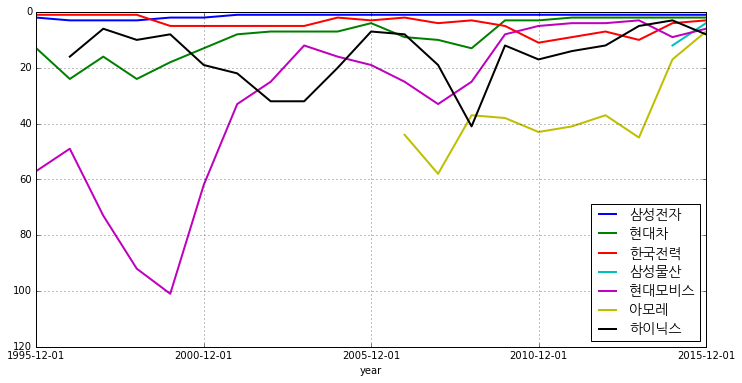

In [24]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=14)

ax = pivoted7.plot(figsize=(12,6), grid=True)
ax.invert_yaxis()

legend = ax.legend(loc='lower right')
for text in legend.texts:
    text.set_font_properties(fontprop)


삼성전자는 거의 부동의 1위이며, 1999년 100위권 현대모비스의 지속적인 약진이 눈에 띈다. 2006년 상장한 아모레는 2014년 이후 급속하게 성장하여 시가총액 7위의 기업이 되었다.

앞서 관심종목으로 지정한 20개 종목을 모두 그려본다.

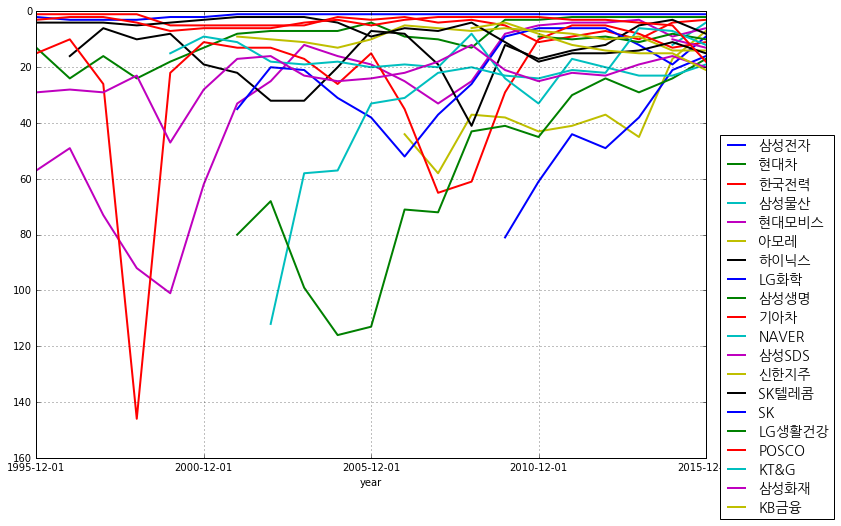

In [28]:
ax = pivoted.plot(figsize=(12,8), grid=True)
ax.invert_yaxis()

legend = ax.legend(loc='lower right', bbox_to_anchor=(1.2, -0.15))
for text in legend.texts:
    text.set_font_properties(fontprop)

다소 순위가 많이 들죽 날쭉 했던 종목으로 '기아차'가 있다. '기아차'의 시가총액 순위만 따로 보면,

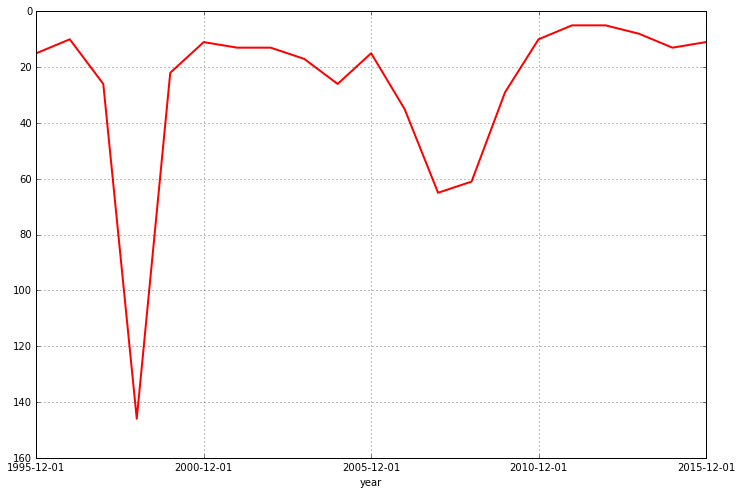

In [32]:
ax = pivoted['기아차'].plot(figsize=(12,8), grid=True, color='r')
ax.invert_yaxis()

'기아차' 종목만 좀 더 자세히 살펴보자.

In [40]:
df_kia = df_master.ix[df_master['corp_name'] == '기아차']
df_kia.set_index('year', inplace=True)
df_kia

,rank,code,corp_name,marcap,marcap_pct
year,,,,,
1995-12-01,15,000270,기아차,1.378519,0.009766
1996-12-01,10,000270,기아차,1.247868,0.009985
1997-12-01,26,000270,기아차,0.464278,0.005948
1998-12-01,146,000270,기아차,0.124969,0.000858
1999-12-01,22,000270,기아차,3.191127,0.007001
2000-12-01,11,000270,기아차,3.192142,0.012213
2001-12-01,13,000270,기아차,3.274633,0.010634
2002-12-01,13,000270,기아차,3.253628,0.010979
2003-12-01,17,000270,기아차,3.921062,0.009977


1996년까지 기아차는 매우 건실한 회사였다(전문 경영인 체제와 지분 구조도 매우 모범적이라고 평가되었다). 
시가총액 1996년 12조였다가, 2년 뒤인 1998년 1/10로 줄었다. 1997년 봄부터 어려워져 결국 10월 법정관리에 넘어가고 1998년에 현대자동차에 매각된다. 1998년 146위 까지 떨어졌다.

시가총액의 변화를 살펴보면, 시가총액 순위의 변화와 비슷한 양상을 보인다. 2015년 기준으로 시가총액 20조원이 넘는 건실한 자동차회사가 되었다.

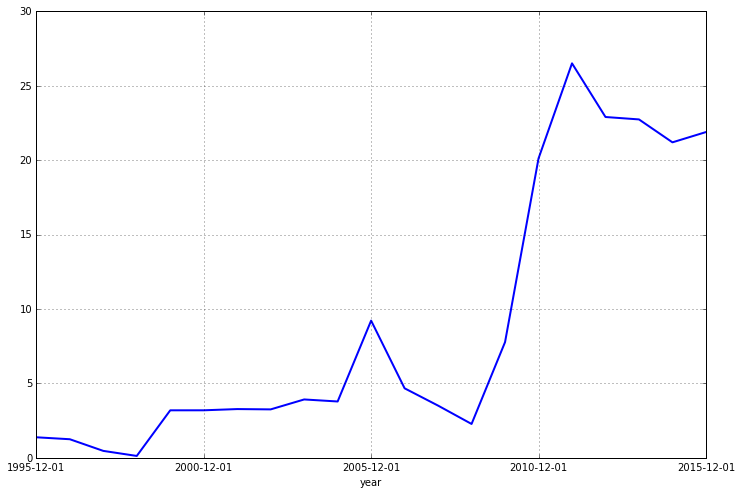

In [42]:
df_kia['marcap'].plot(figsize=(12,8), grid=True)